<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/main/yolov8/01_yolo_v8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Train


## Imports and GPU Check

Check access to GPU.

In [1]:
!pip install python-dotenv
!nvidia-smi

Mon Nov 13 22:53:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   49C    P8              25W / 240W |    893MiB /  8192MiB |     22%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Imports

In [2]:
import os
#from google.colab import drive
import dotenv

In [3]:
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8


## Get Environment Variables from drive

Mount your Google Drive.

In [ ]:
#drive.mount('/content/drive/')

Mounted at /content/drive/



Load the .env file

In [4]:
dotenv.load_dotenv('../yolov8/yolov8.env')
#dotenv.load_dotenv('/content/drive/MyDrive/Colab_Notebooks/env/yolov8/yolov8.env')

True

In [5]:
ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [6]:
!pip install ultralytics

In [7]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.208  Python-3.11.6 torch-2.1.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
Setup complete  (12 CPUs, 31.9 GB RAM, 244.0/1862.2 GB disk)


## Model

In [15]:
#!mkdir ./datasets
#%cd ./datasets
!pip install roboflow

In [16]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.208, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sea-turtles-1 in yolov8:: 100%|██████████| 2728/2728 [00:01<00:00, 2501.36it/s]


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for 25 epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [ ]:
print(HOME)

/content


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.7MB/s]



In [ ]:
print(dataset.location)
print(HOME)

/content/datasets/sea-turtles-1
/content


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/sea-turtles-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [ ]:
DRIVE_YOLOV8='/drive/MyDrive/Colab_Notebooks/env/yolov8/runs'

In [ ]:
!ls {HOME}{DRIVE_YOLOV8}/detect/train/

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1698004023.feae51e8c0a1.26603.0  train_batch1.jpg	    val_batch1_pred.jpg
F1_curve.png					     train_batch2440.jpg    val_batch2_labels.jpg
P_curve.png					     train_batch2441.jpg    val_batch2_pred.jpg
PR_curve.png					     train_batch2442.jpg    weights
R_curve.png					     train_batch2.jpg
results.csv					     val_batch0_labels.jpg


/content


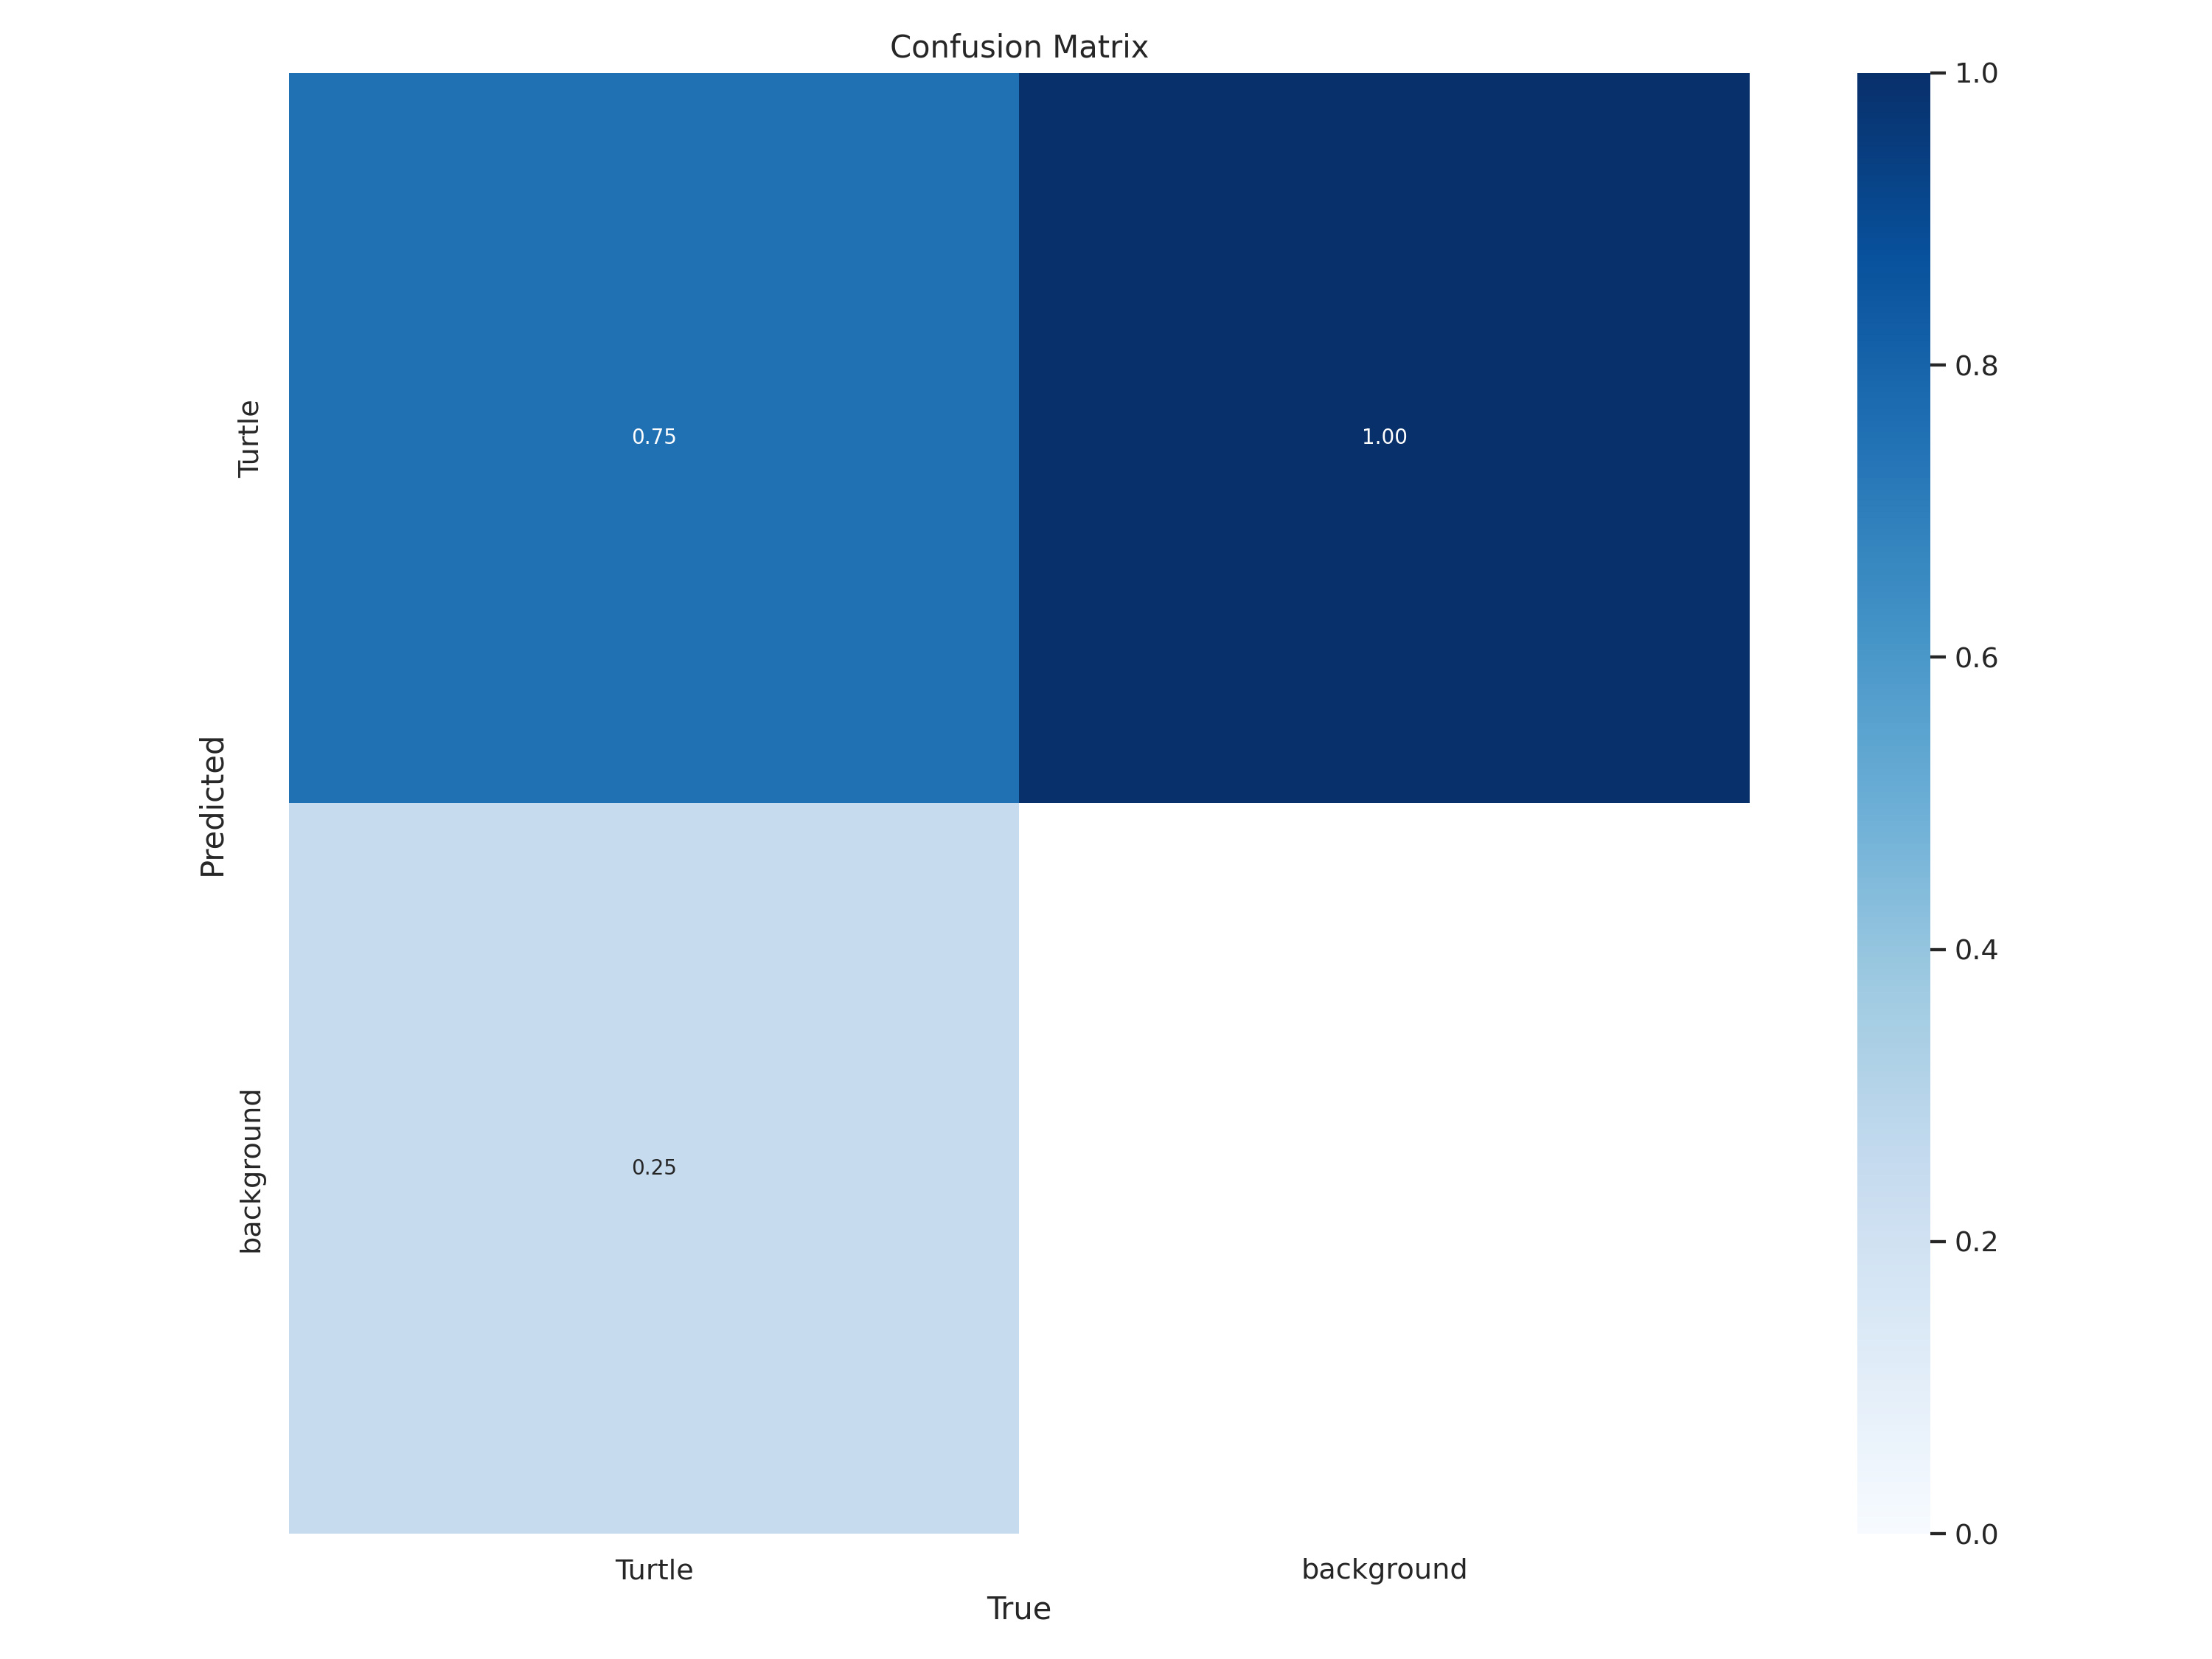

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/confusion_matrix.png', width=600)
#Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


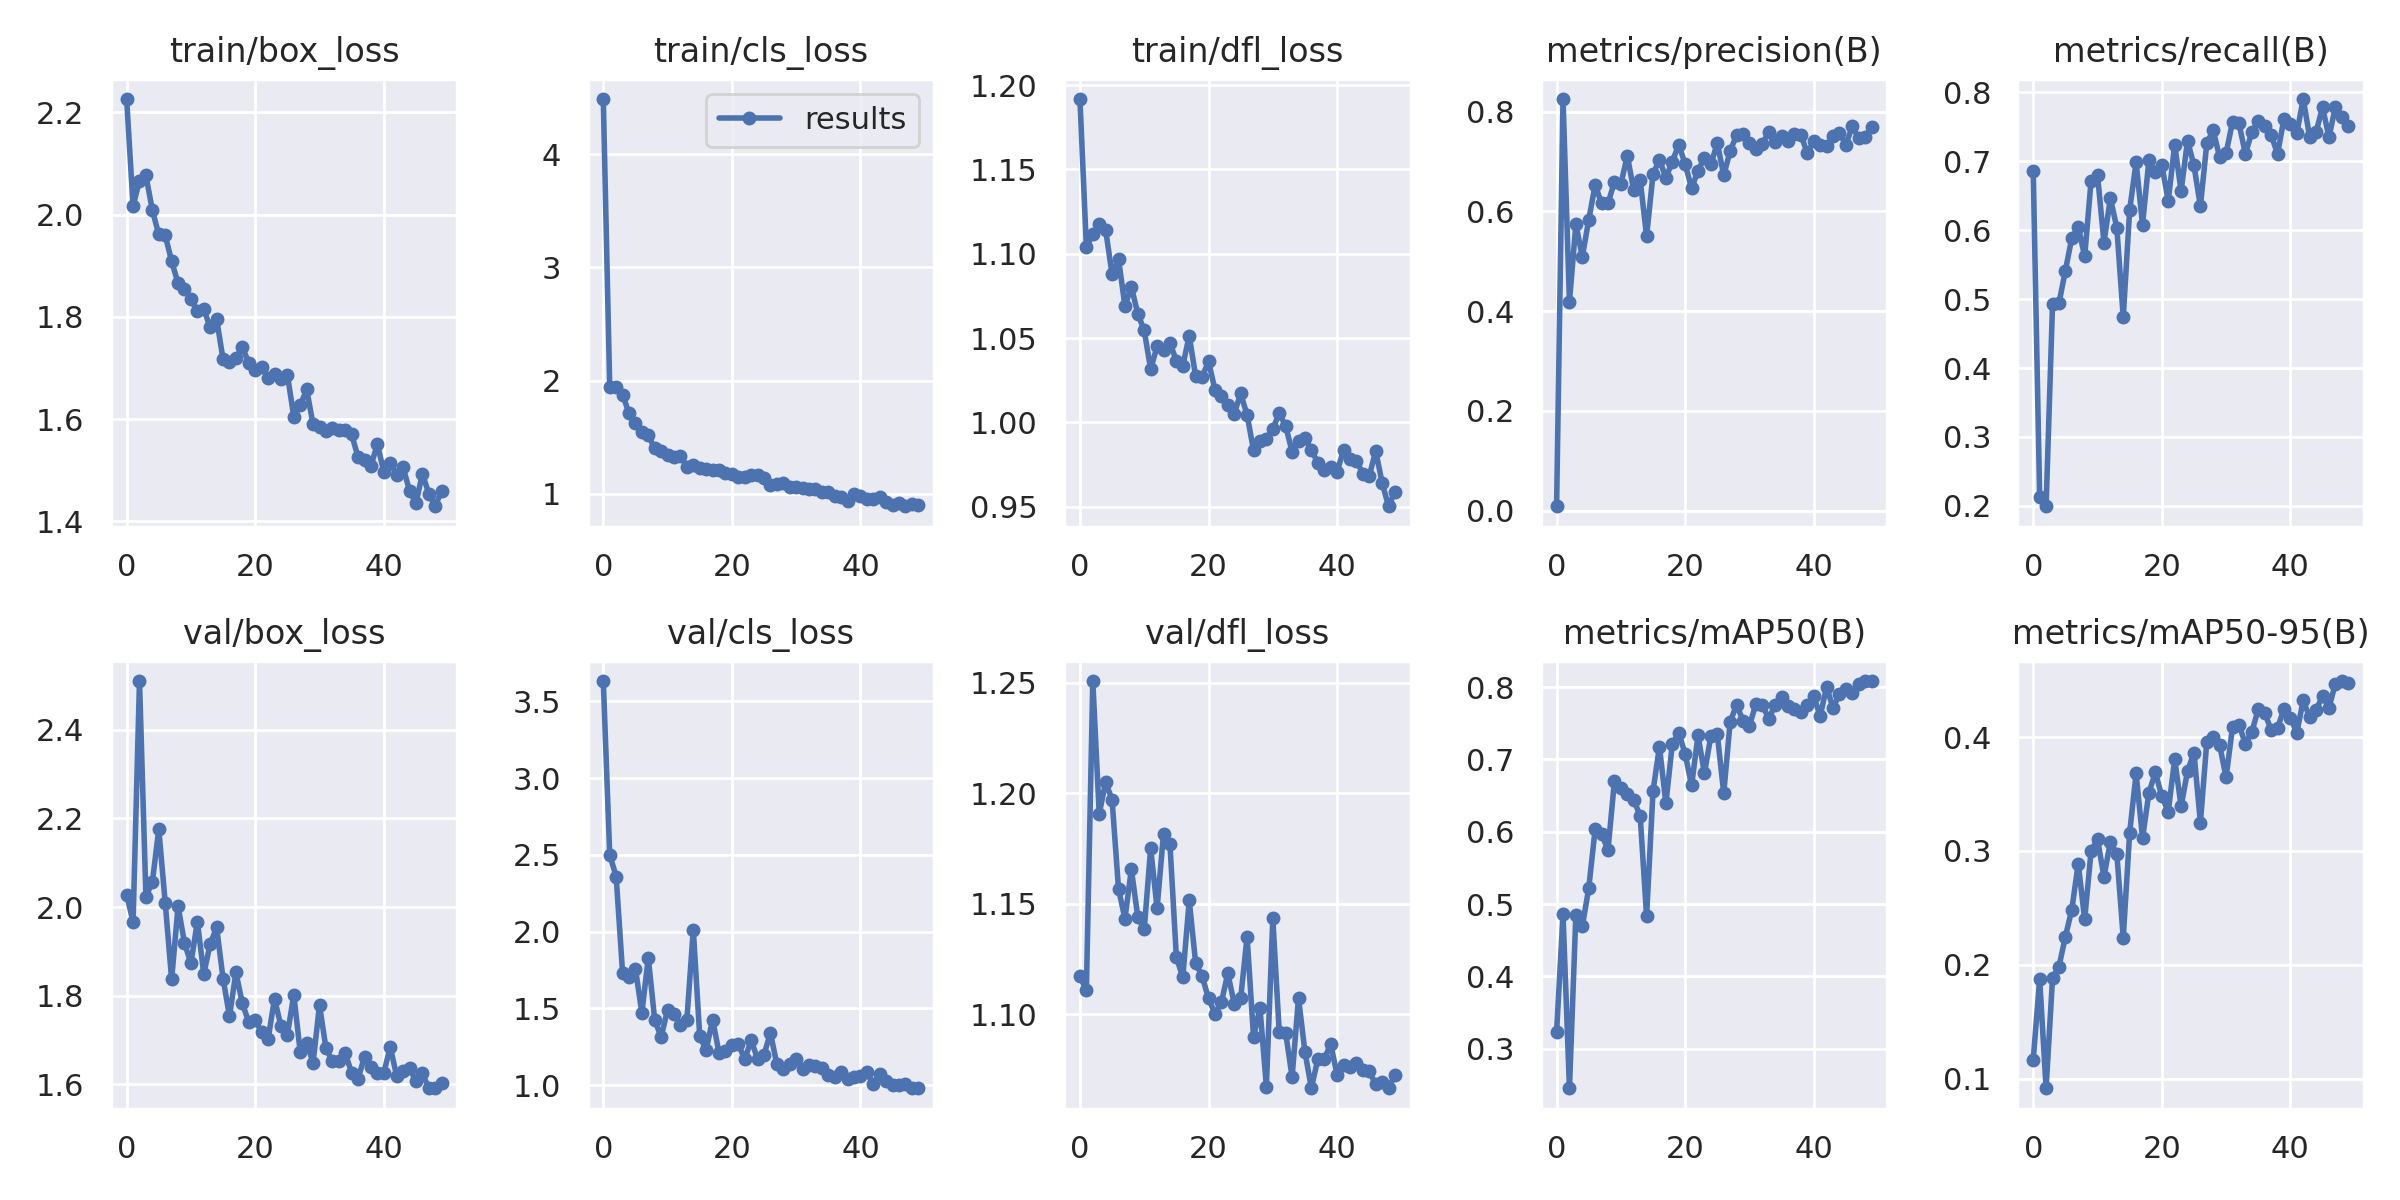

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/results.png', width=600)

/content


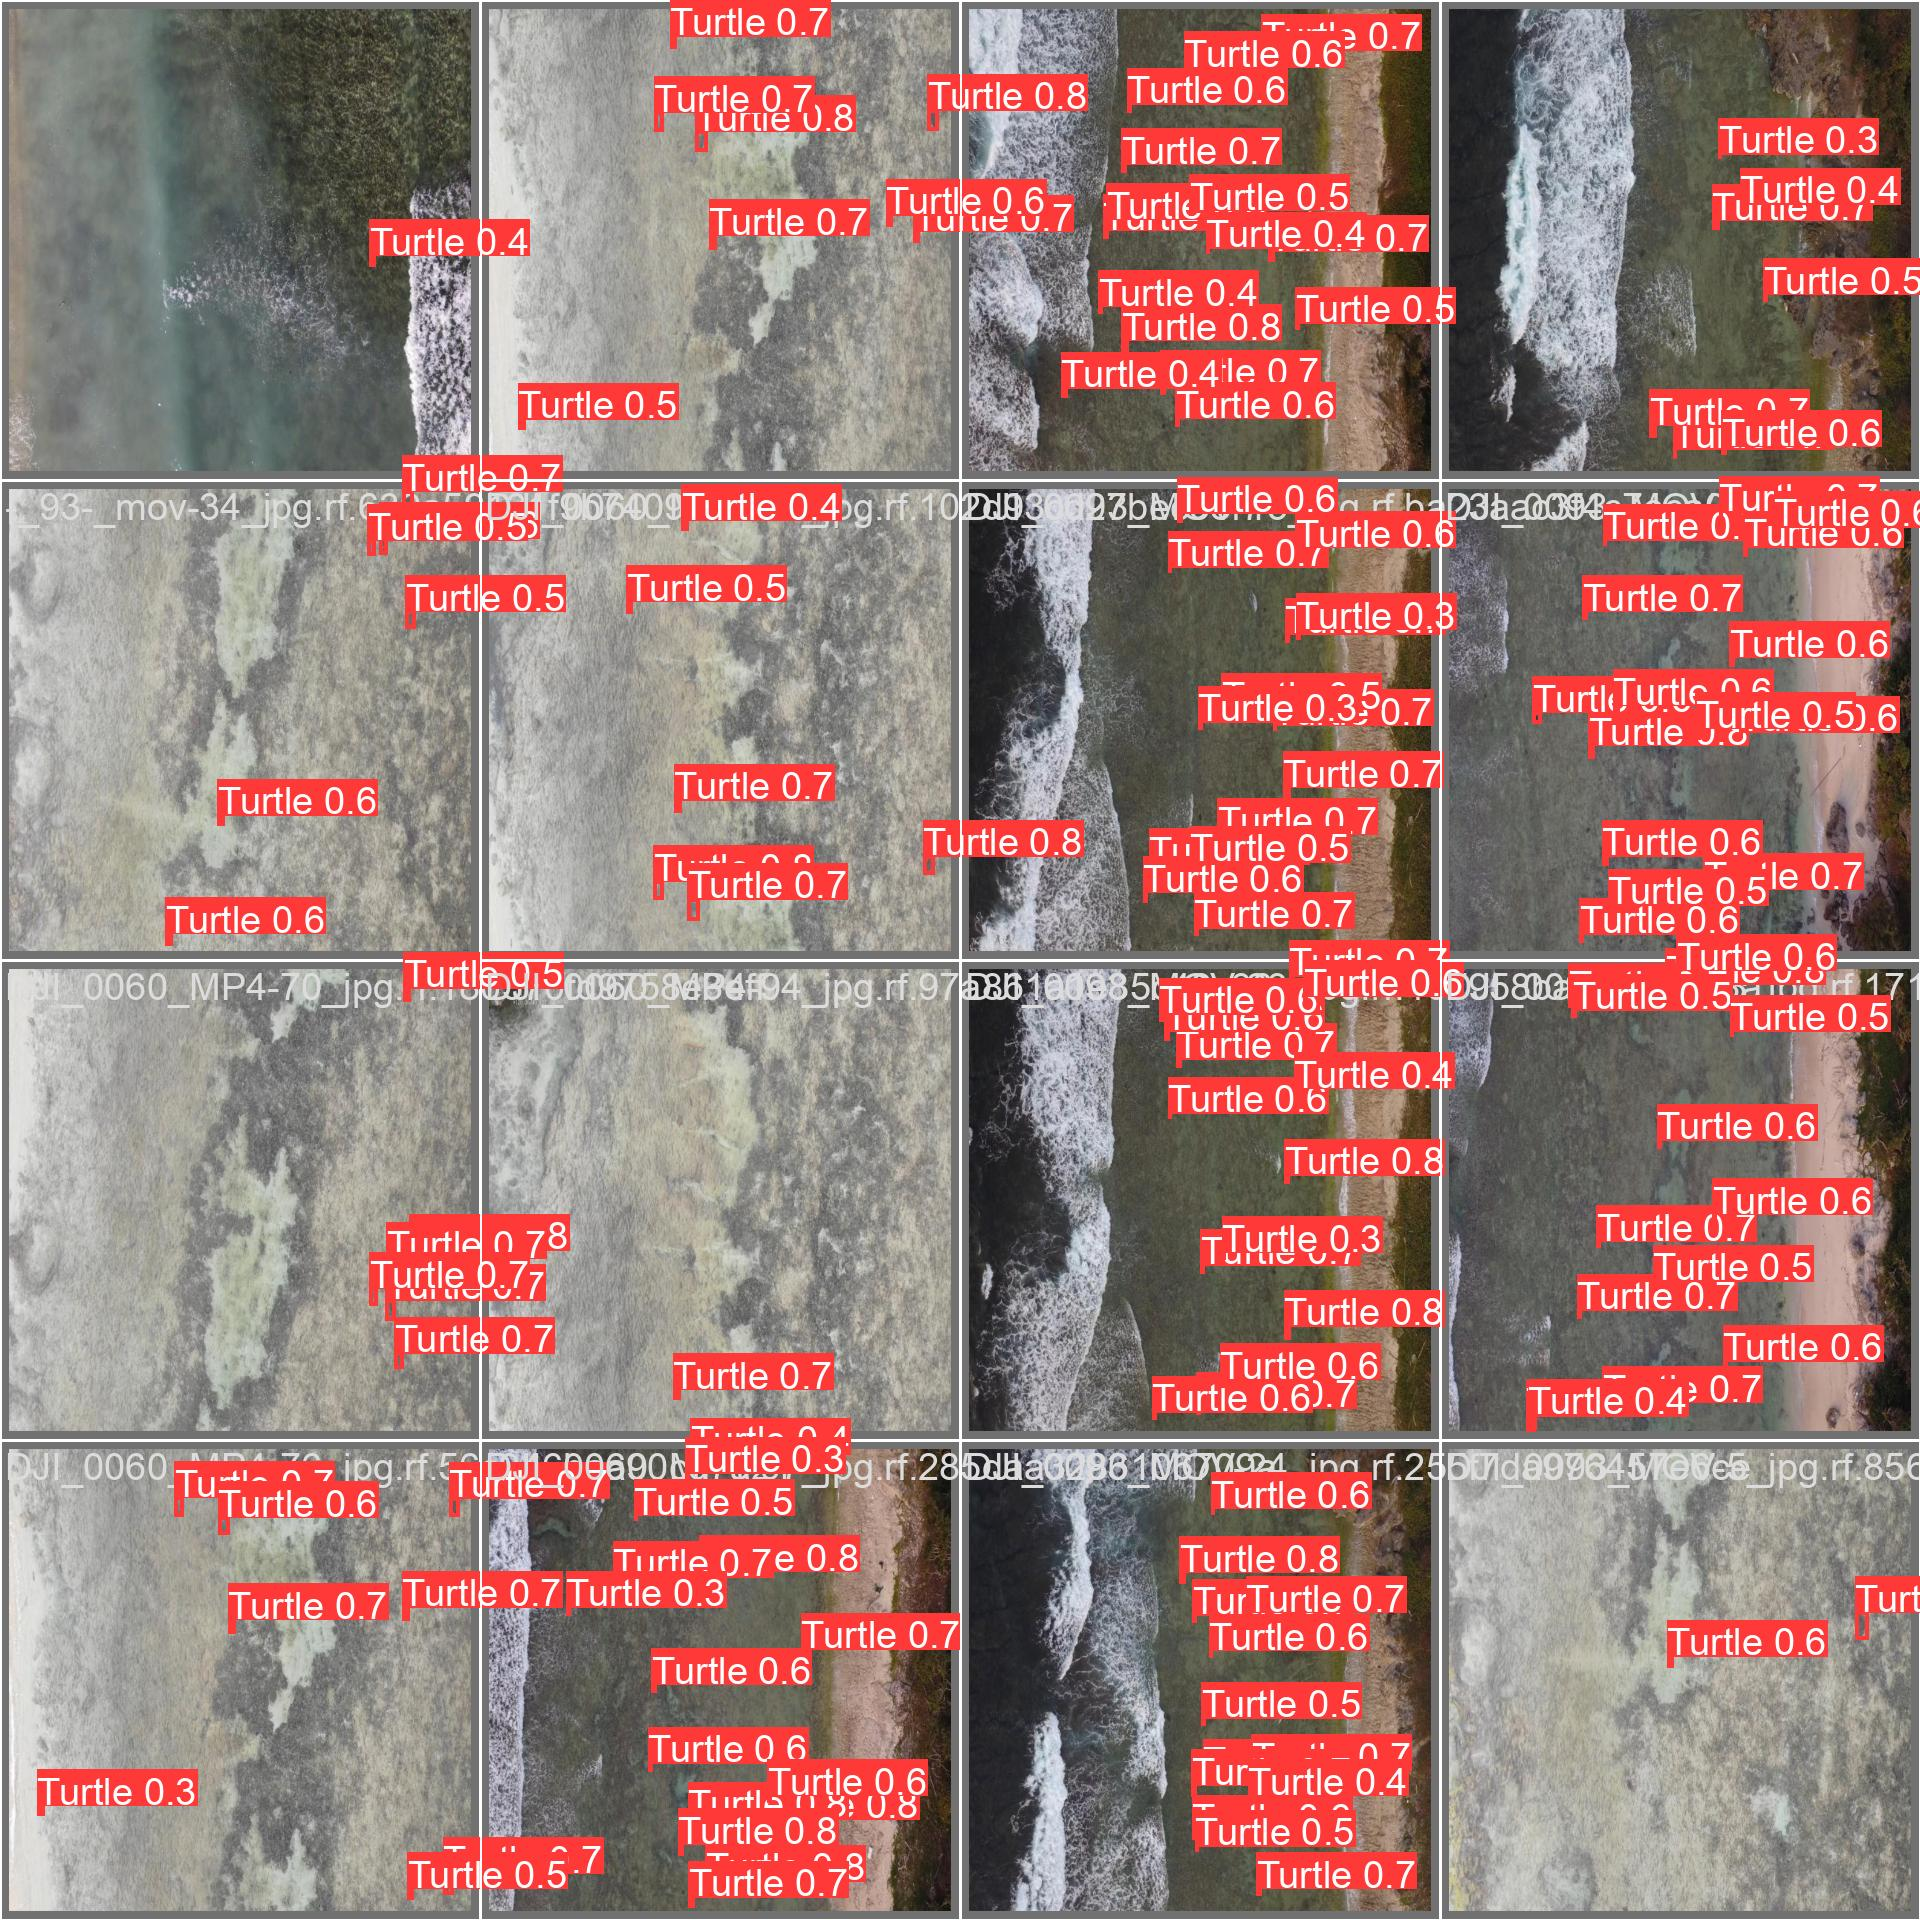

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

In [ ]:
%cd {HOME}{DRIVE_YOLOV8}
!yolo task=detect mode=predict model={HOME}{DRIVE_YOLOV8}/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs
2023-10-22 20:52:23.653245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 20:52:24.744953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/118 /content/datasets/sea-turtles-1/test/images/-_93-_mov-60_jpg.rf.a28004c0eb5ebc7eac5104c8c92f832e.jpg: 800x800 1 Turtle, 9.9ms
image 2/118 /content/datasets/sea-turtles-1/test/images/20150806cr4mainnestingbeachcenterlane_20150807_010042_IMG_9800_NIR_jpg.rf.3f8e79133c95b4e93eef48a290d26892.jpg: 800x800 1 Turtle, 10.0ms
image 3/118 

**NOTE:** Let's take a look at few results.

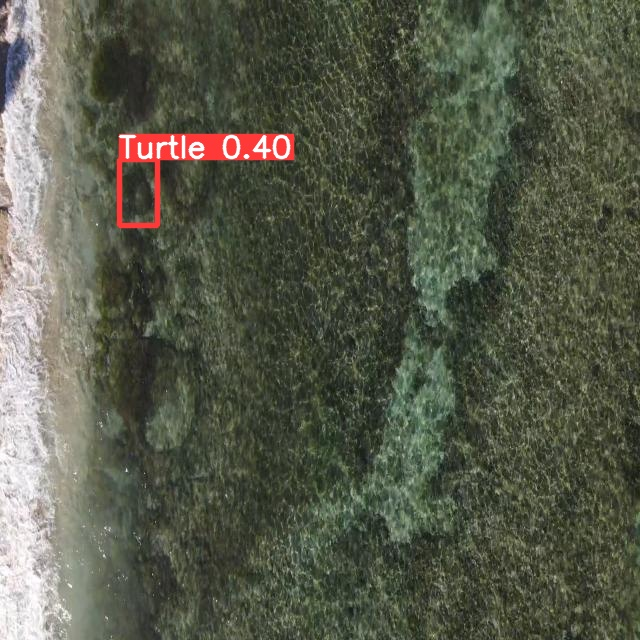

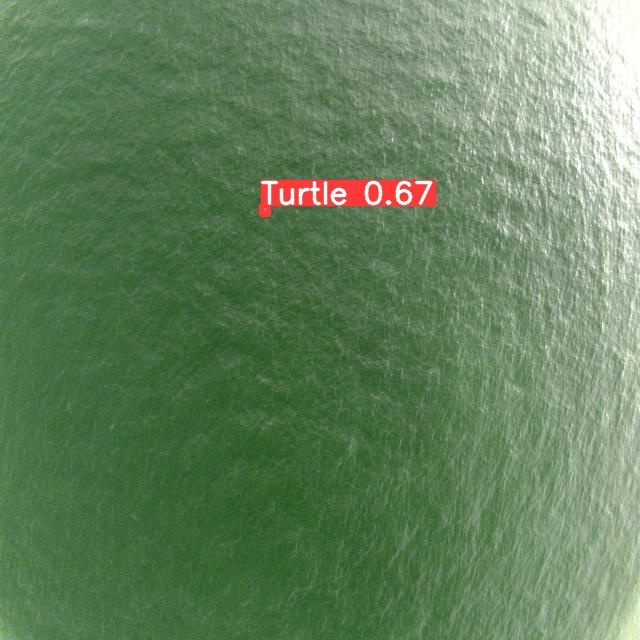

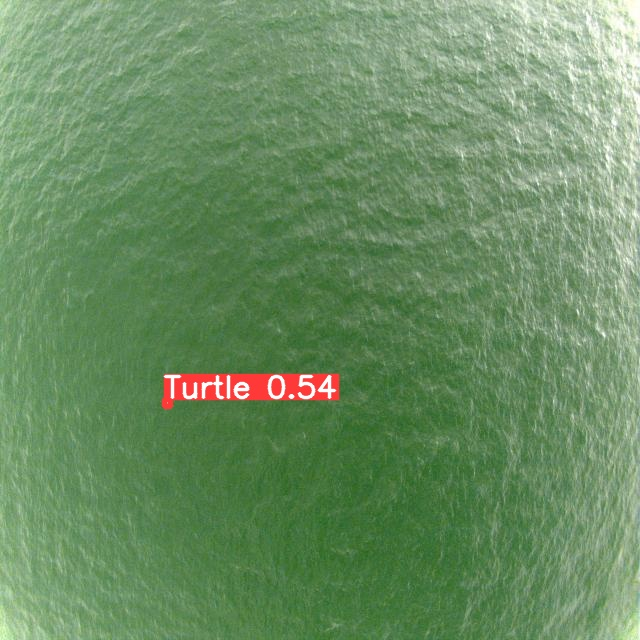

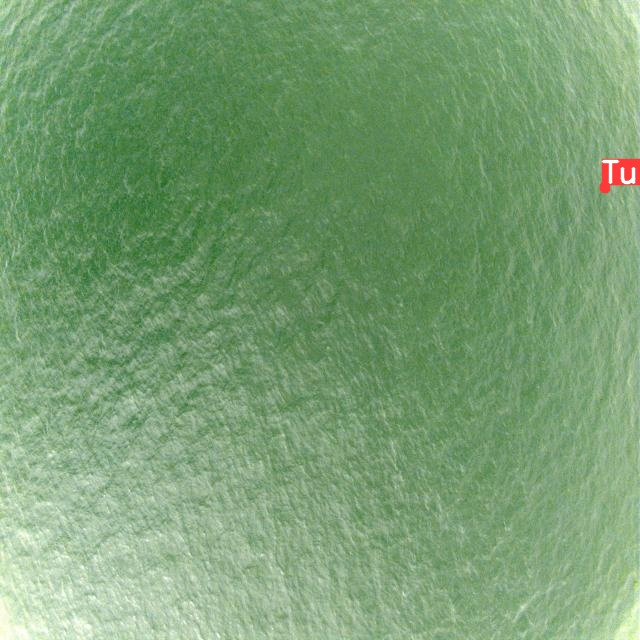

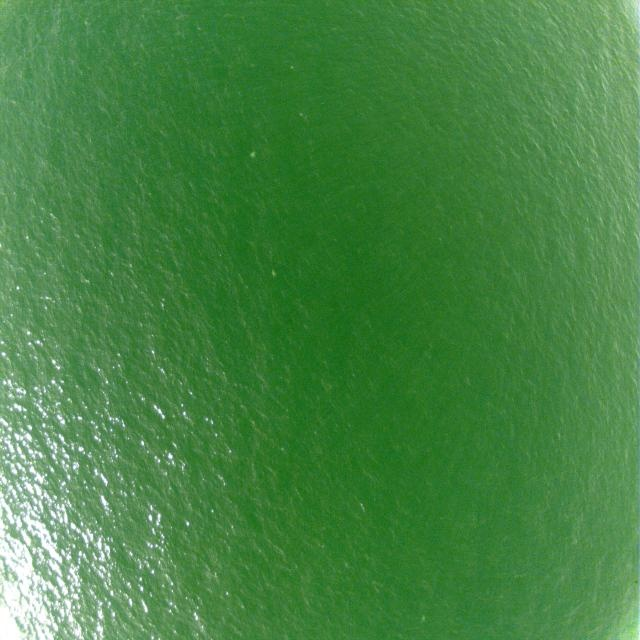

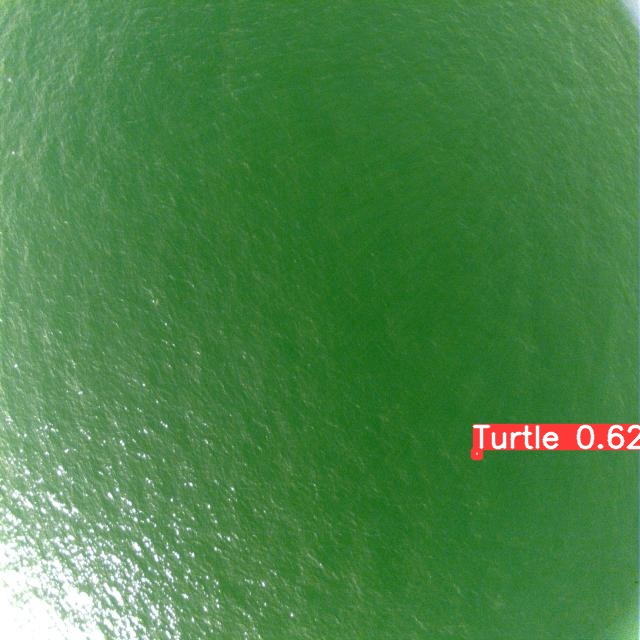

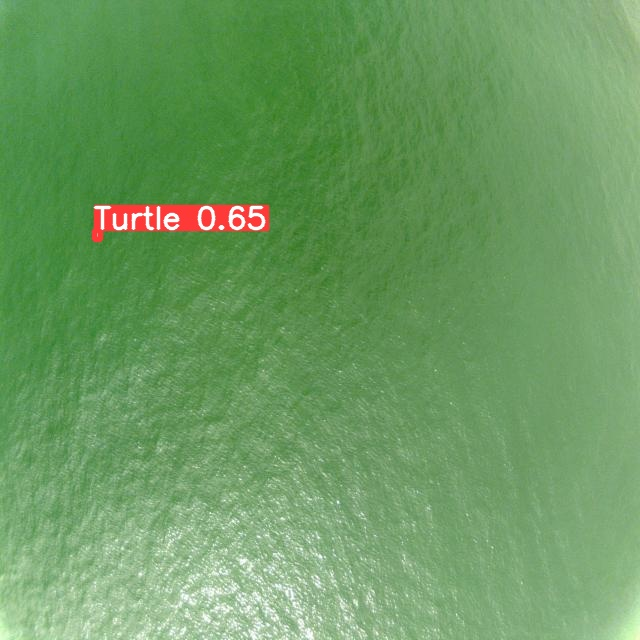

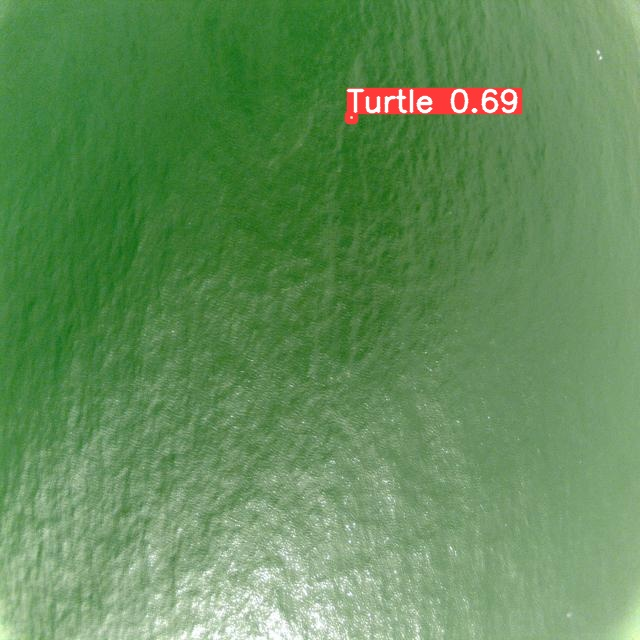

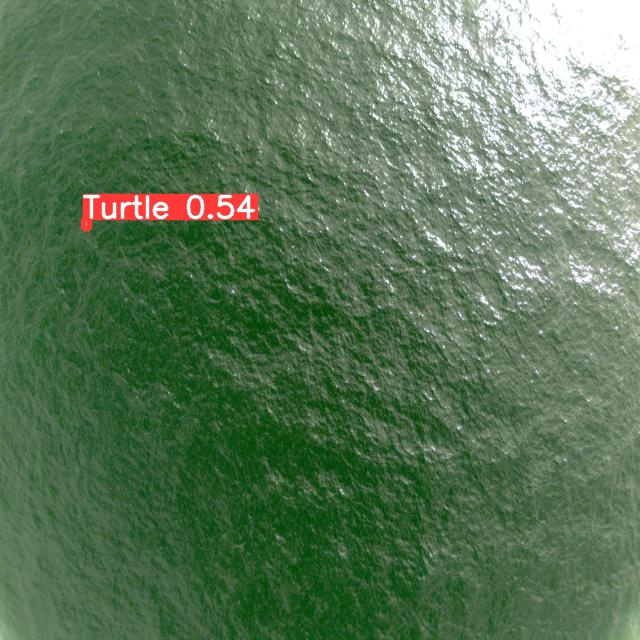

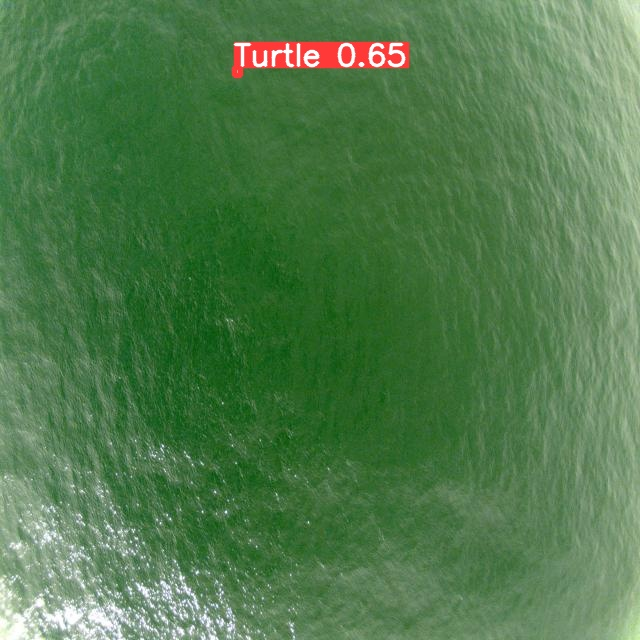

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}{DRIVE_YOLOV8}/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
COUNT=1

In [ ]:
%cd {HOME}{DRIVE_YOLOV8}/videos_out
# Save Output with Bounding Boxes to a Text File
!yolo task=detect mode=predict model={HOME}{DRIVE_YOLOV8}/detect/train/weights/best.pt conf=0.1 source={HOME}{DRIVE_YOLOV8}/videos/video1.mp4 > {HOME}{DRIVE_YOLOV8}/videos/output.txt save=True


/content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos_out
2023-10-22 22:50:42.652658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 22:50:43.732588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
video 1/1 (1/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 480x800 2 Turtles, 53.1ms
video 1/1 (2/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 480x800 4 Turtles, 7.3ms
video 1/1 (3/2057) /content/drive/MyDrive/Colab_Notebooks/env/yolov8/runs/videos/video1.mp4: 48

No nee for that:

In [ ]:

# Visualize Bounding Boxes on the Video and Save Annotated Video
import ast
import cv2

COUNT = COUNT +1
# Load the YOLO output from the text file
with open(f'{HOME}{DRIVE_YOLOV8}/output.txt', 'r') as f:
    yolo_output = f.readlines()

# Read the original video
video_path = f'{HOME}{DRIVE_YOLOV8}/videos/video1.mp4'
video_capture = cv2.VideoCapture(video_path)
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
output_video_path = f'{HOME}{DRIVE_YOLOV8}/videos/video1_annotated_{COUNT}.mp4'
output_video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

# Process each frame and draw bounding boxes
for frame_id, frame_output in enumerate(yolo_output):
    ret, frame = video_capture.read()
    if not ret:
        break

    # Parse YOLO output for the current frame
    detections = ast.literal_eval(frame_output)
    for detection in detections:
        x, y, w, h, confidence, class_id = detection
        x1, y1, x2, y2 = int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)

        # Draw bounding box on the frame using OpenCV
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 2
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

        # Optionally, put the class label and confidence on the frame
        label = f"Class: {class_id}, Confidence: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, thickness)

    # Write the frame with bounding boxes to the output video
    output_video.write(frame)

# Release video capture and video writer objects
video_capture.release()
output_video.release()

# Print a message indicating the completion of the video annotation and saving process
print("Video annotation and saving are complete.")


Video annotation and saving are complete.
